Installing dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
(kuch glt bhi ho sakta check in copilot GPU REMOVED)

# INSTALL DEPENDENCIES AND SETTING GPU LIMITED

In [6]:
import tensorflow as tf   # type: ignore #type ignore
import os



In [7]:
os.path.join('data','happy')


'data\\happy'

In [9]:
gpus = tf.config.experimental.list_physical_devices('CPU')


In [10]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
# BEGIN: Set GPU memory consumption growth
# so that not all GPU memory is allocated at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# END: Set GPU memory consumption growth

# Remove dodgy images

In [12]:
import cv2 #type: ignore
import imghdr
import matplotlib.pyplot as plt     # type: ignore

C:\Program Files\KMSpico\temp\ipykernel_10556\3450307694.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [13]:
data_dir = r'C:\Users\Yash Seth\Desktop\Image classify\python code\data2'
os.listdir(data_dir)

['can', 'glass', 'paper', 'plastic', 'plastic_bag', 'styrofoam']

In [14]:
# Load the image
img=cv2.imread(os.path.join(data_dir, 'can', 'IMG_8482.jpeg'))

In [15]:
if img is not None:
    print(img.shape)
else:
    print("Failed to load image.")


(3024, 4032, 3)


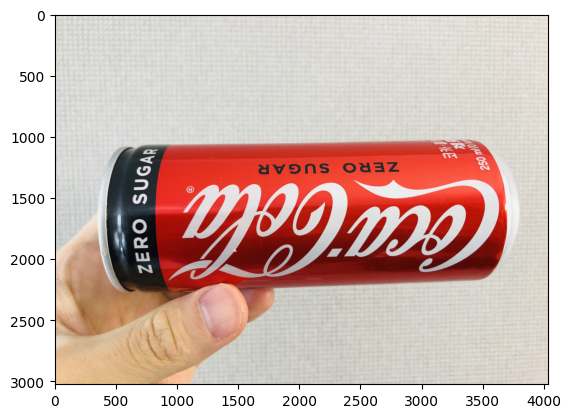

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#fixing colors alos

In [17]:
image_exts = ['jpg','jpeg','png','bmp'] # list of valid image extensions

In [18]:
image_exts[0] #accessing the first element of the list

'jpg'

In [19]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
       image_path = os.path.join(data_dir,image_class,image)
       try:
           img=cv2.imread(image_path)
           tip=imghdr.what(image_path)
           if tip not in image_exts:
               print(f'image not in ext list {image_path}')
               os.remove(image_path)
       except Exception as e:
            print(f'Error processing image {image_path} {e}')
            os.remove(image_path)     

#deleted the images which are not in the list of image_exts  

# Load Data

In [21]:
import numpy as np #type: ignore
from matplotlib import pyplot as plt #type: ignore

In [22]:
# now going to load data ,this util will shuffle resize and batch the data and also will preprocess the data
data=tf.keras.utils.image_dataset_from_directory(data_dir) 
#use comma and you can change batch size and image size

Found 282 files belonging to 6 classes.


In [38]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
#checking each data or iterating through the data 
# allowing us to acces the data as numpy array and as data pipeline
#iterator at previous and batch as next

data_iterator=data.as_numpy_iterator()


In [24]:
#get another batch
batch=data_iterator.next()

In [25]:
len(batch)
#two parts one as data and other as labels (image representation )


2

In [26]:
#image representation as numpy array
batch[0].shape
#making the size of each image component 

(32, 256, 256, 3)

In [27]:
#in each batch one class get one label 
#here in ours ,class 0 is can and class 1 is glass and class 2 is paper  and class 3 is glass and class 4 is plastic bag 
#class 5 is styrofoam
batch[1]

array([4, 2, 0, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 3, 4, 2, 2, 3, 3, 2, 1, 1,
       2, 3, 4, 2, 3, 3, 0, 2, 3, 3])

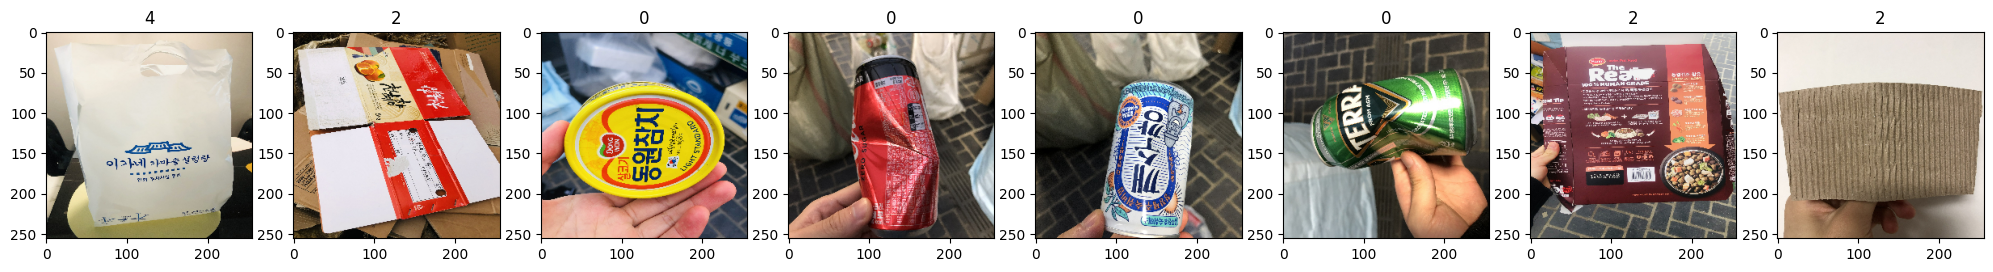

In [28]:
fig,ax =plt.subplots(ncols=8,figsize=(25,25))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))    
    ax[idx].title.set_text(batch[1][idx])


# PRE-PROCESS THE DATA

#scaling the data 

In [29]:
batch[0].min()

0.0

In [30]:
batch[0].max()

255.0

In [31]:
#batch[0] is image part while batch[1] is label 
#converting values from  0 to 1
scaled=batch[0]/255


In [32]:
scaled.min()


0.0

In [33]:
scaled.max()

1.0

In [34]:
#transforming data pipelines
#x represents images while y represents labels
data=data.map(lambda x,y :(x/225,y))

In [35]:
#grabbing first set of images
scaled_iterator=data.as_numpy_iterator()

In [36]:
batch=scaled_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0011458333..1.0373611].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1062152].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1019098].


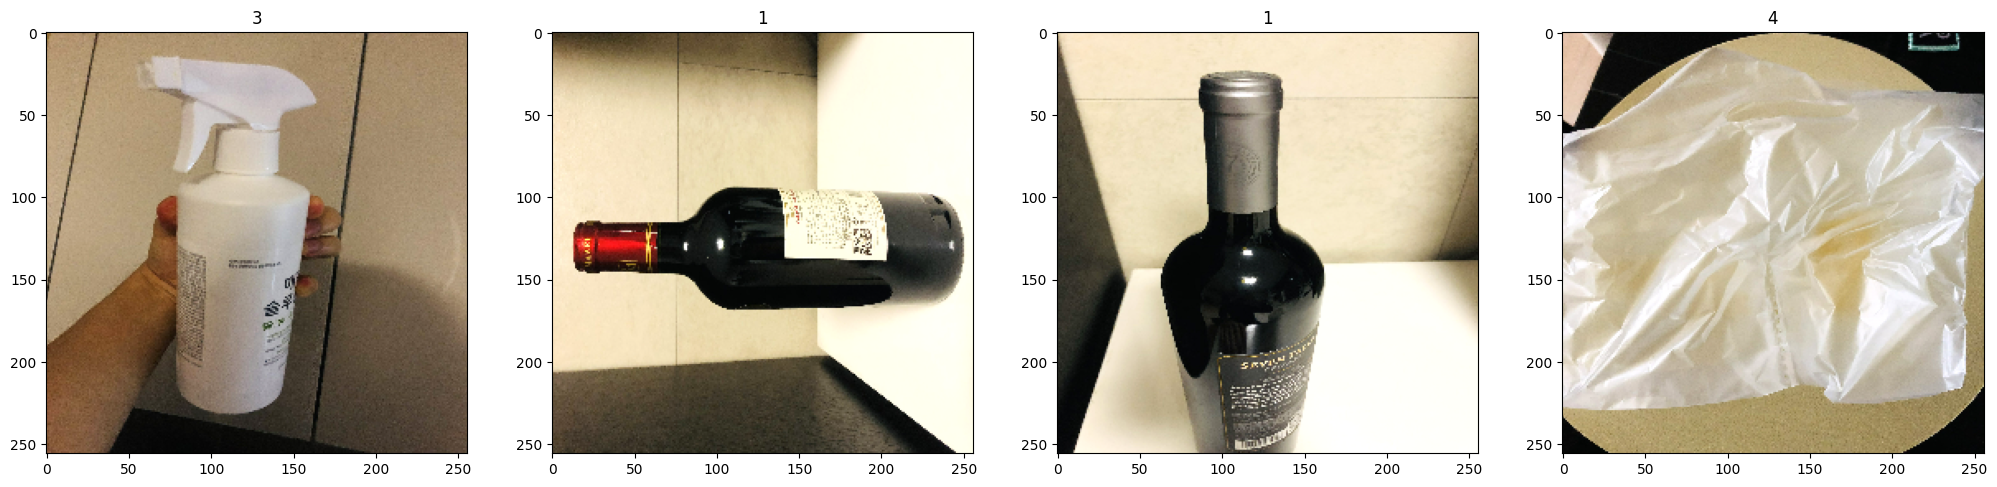

In [37]:
fig,ax =plt.subplots(ncols=4,figsize=(25,25))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #as astype int will make 0 to 1 value as 0    
    ax[idx].title.set_text(batch[1][idx])


In [43]:
batch[0]

array([[[[0.6380382 , 0.47359374, 0.28692707],
         [0.61057293, 0.4594618 , 0.24807292],
         [0.68538195, 0.5387153 , 0.33899304],
         ...,
         [0.6742188 , 0.5631076 , 0.42532986],
         [0.6867014 , 0.58447915, 0.44670138],
         [0.6277604 , 0.52637154, 0.41970485]],

        [[0.5406424 , 0.39684027, 0.19111112],
         [0.59602433, 0.45380208, 0.23796874],
         [0.58355904, 0.43689236, 0.23717014],
         ...,
         [0.6622222 , 0.5511111 , 0.41333333],
         [0.6393576 , 0.5282465 , 0.3949132 ],
         [0.6269444 , 0.52555555, 0.4188889 ]],

        [[0.6172743 , 0.47949654, 0.27505207],
         [0.55649304, 0.41427085, 0.20538194],
         [0.61286455, 0.47064236, 0.26175347],
         ...,
         [0.6556944 , 0.5445833 , 0.41125   ],
         [0.6404688 , 0.5293576 , 0.39602432],
         [0.64295137, 0.53628474, 0.42600694]],

        ...,

        [[0.52050346, 0.3516146 , 0.24939236],
         [0.4496007 , 0.26737848, 0.1696007 ]